In [1]:
import numpy as np
from typing import Tuple, Callable, Optional
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import requests
import datetime


### Exercicio 1

> Escreva uma função cuja entrada sejam duas matrizes, $A$ e $B$, e a saída seja a matriz resultante do produto das entradas.
> Não utilize nenhuma função de multiplicação de matrizes pronta, faça você mesmo os loops necessários para a multiplicação.
> Coloque uma mensagem de erro quando o número de colunas de $A$ não for igual ao número de linhas de $B$. > Utilize as arrays do numpy.

In [2]:
def verifica_se_eh_matriz(M: np.ndarray):
    if not isinstance(M, np.ndarray):
        raise TypeError(f"O parametro recebido deve ser um numpy.ndarray. Nao {type(M)}")
    if M.ndim != 2:
        raise ValueError(f"O parametro recebido deve ser uma matriz 2D. Recebido {M.ndim}D")
    
    
def multiplica_matriz(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    verifica_se_eh_matriz(A)
    verifica_se_eh_matriz(B)
    n, p = A.shape
    q, m = B.shape
    if p != q:
        raise ValueError(f"Nao pode multiplicar. A e B tem formatos {A.shape} e {B.shape}")
    M = np.zeros((n, m), dtype="float64")  # Matriz resultado
    for i in range(n):
        for j in range(m):
            for k in range(p):
                M[i, j] += A[i, k] * B[k, j]
    return M

def test_multiplica_matriz(ntests = 100):
    for i in range(ntests):
        n, m, p= np.random.randint(4, 11, size=3)
        A = 4*np.random.rand(n, p) - 2
        B = 4*np.random.rand(p, m) - 2
        Cgood = np.dot(A, B)  # Valor verdadeiro, calculado pelo proprio numpy
        Ctest = multiplica_matriz(A, B)  # Resultado na nossa funcao
        np.testing.assert_equal(Ctest, Cgood)  # Compara pra ver se o resultado da funcao eh bom

### Exercício 2

> Crie uma função que tenha como entrada uma matriz qualquer $M \times N$ e como saída a média e o desvio padrão dos elementos dessa matriz

In [3]:
def calcula_media_desvio(A: np.ndarray) -> Tuple[float, float]:
    verifica_se_eh_matriz(A)
    M, N = A.shape
    soma = 0
    for i in range(M):
        for j in range(N):
            soma += A[i, j]
    media = soma/(M*N)
    somaquad = 0
    for i in range(M):
        for j in range(N):
            somaquad += (A[i, j] - media)**2
    variancia = somaquad/(M*N)
    desvio = np.sqrt(variancia)
    return media, desvio

def test_calcula_medio_desvio(ntests: int = 100):
    for i in range(ntests):
        M, N = np.random.randint(4, 11, size=2)
        A = 4*np.random.rand(M, N) - 2
        mtest, dtest = calcula_media_desvio(A)
        mgood = np.mean(A)
        dgood = np.std(A)
        np.testing.assert_almost_equal(mtest, mgood)
        np.testing.assert_almost_equal(dtest, dgood)

test_calcula_medio_desvio()

### Exercício 3

> Crie uma matriz $N \times N$ de números aleatórios com valores entre $−2$ e $2$.
> Utilize a função do exercício anterior para calcular a média e o desvio padrão dos elementos dessa matriz.
> O que acontece com esses valores quando $N \to \infty$?
> 
> Dica: o numpy tem uma função que gera números aleatórios

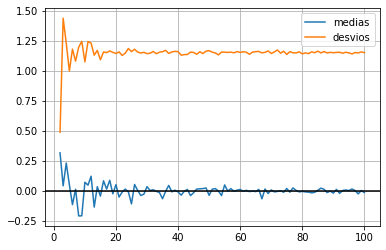

In [4]:
Ns = np.arange(2, 101)
medias = np.zeros(Ns.shape)
desvios = np.zeros(Ns.shape)
for i, N in enumerate(Ns):
    A = 4*np.random.rand(N, N)-2
    m, d = calcula_media_desvio(A)
    medias[i] = m
    desvios[i] = d

plt.plot(Ns, medias, label="medias")
plt.plot(Ns, desvios, label="desvios")
plt.axhline(y=0, color="k")
plt.legend()
plt.grid()
plt.show()

### Exercício 4

> Desenvolva um programa que pede o nome e a idade do usuário (use a função ```input```) e imprime esses valores em um arquivo texto de saída.
> Depois desenvolva um programa para ler os dados desse arquivo texto e imprimir o resultado na tela.
> 
> **Observação**: a variável obtida a partir da função ```input``` é sempre do tipo ```string```.
> Se você quiser utilizar o valor de entrada como ```int``` ou ```float``` você tem que fazer a conversão.

In [5]:
while True:
    # nome = input("Digite seu nome")
    nome = "Carlos"
    if len(nome) > 2:
        break
print(f"Nome lido = {nome}")

while True:
    # idade = input("Digite sua idade")
    idade = "26"
    try:
        idade = int(idade)
        break
    except ValueError as e:
        print("Sua idade é invalida! Digite um inteiro!")
print(f"Idade lida = {idade}")

print("Salvando no arquivo!")
filename = "myfile.txt"
with open(filename, "w") as file:
    file.write(nome + "\n")
    file.write(str(idade))

print("Lendo o arquivo!")
with open(filename, "r") as file:
    lines = file.readlines()
nome_arquivo = lines[0].replace("\n", "")
idade_arquivo = int(lines[1])
print(f"Nome lido do arquivo = {nome_arquivo}")
print(f"Idade lida do arquivo = {idade_arquivo}")

Nome lido = Carlos
Idade lida = 26
Salvando no arquivo!
Lendo o arquivo!
Nome lido do arquivo = Carlos
Idade lida do arquivo = 26


### Exercício 5

> Crie um jogo de pedra, papel e tesoura.
> Utilize a função ```input``` para pegar a opção do jogador humano e utilize números aleatórios para gerar a resposta do computador.
> Faça primeiro um jogo que tenha a mesma probabilidade de vitória, derrota ou empate.
> Depois desenvolva um jogo em que a probabilidade do computador vencer seja maior, utilizando também números aleatórios.
> Faça alguns testes.

In [6]:
import numpy as np

def board_win(board: np.ndarray):
    """Recide se o jogador com esse tabuleiro ganhou ou nao"""
    ones = slice(0, 3, 1)
    eye = np.eye(3, dtype="bool")
    yey = eye[::1,::-1].T
    if np.all(board[eye]):
        return True
    if np.all(board[yey]):
        return True
    for i in range(3):
        if np.all(board[i, ones]):
            return True
        if np.all(board[ones, i]):
            return True
    return False

def get_empty_places(board: np.ndarray):
    pairs = []
    for i in range(3):
        for j in range(3):
            if not board[i, j]:
                pairs.append((i, j))
    return np.array(pairs, dtype="int16")

def get_input_player(boardblue: np.ndarray, boardred: np.ndarray):
    """Recebe o tabuleiro com as vagas ocupadas, e retorna (i, j) com a posicao selecionada"""
    occuped = boardblue + boardred
    if np.all(occuped):
        raise ValueError("Cannot get input from player. Board is full!")
    while True:
        response = input("Digite as coordenadas para por: x, y")
        try:
            x, y = response.split(",")
            x = int(x)
            y = int(y)
            if not 0 < x < 4:
                print(f"O valor de (x) deve ser 1, 2 ou 3")
                continue
            if not 0 < y < 4:
                print(f"O valor de (y) deve ser 1, 2 ou 3")
                continue
            if occuped[x-1, y-1]:
                print(f"O lugar selecionado ({x}, {y}) ja esta ocupado, tente outro!")
                continue
            return x-1, y-1
        except Exception as e:
            print("O input nao foi valido! Tente denovo!")
            print(f"Causa: error = {e}")


def compute_probability_win(boardblue: np.ndarray, boardred: np.ndarray):
    """Uses recursion to know what is the probability of boardblue to win"""
    if board_win(boardblue):
        return 1
    if board_win(boardred):
        return 0
    frees = get_empty_places(boardblue + boardred)
    if len(frees) == 0:
        return 0.5  # Draw
    probabas = []
    for i, j in frees:
        boardblue[i, j] = True
        if np.all(boardblue + boardred):
            prob = 0.5
        else:
            prob = 1 - compute_probability_win(boardred, boardblue)
        boardblue[i, j] = False
    prob = np.sum(np.array(probabas)/frees.shape[0])
    return prob


def get_best_pair(boardblue: np.ndarray, boardred: np.ndarray):
    """Returns the best pair to the boardblue to win.
    If there's more than one, we random it"""
    frees = get_empty_places(boardblue + boardred)
    probabas = []
    for i, j in frees:
        boardblue[i, j] = True
        prob = compute_probability_win(boardblue, boardred)
        boardblue[i, j] = False
        probabas.append(prob)
    probabas = np.array(probabas)
    mask = (probabas == np.max(probabas))
    index = np.random.randint(np.sum(mask))
    return (frees[mask])[index]


def get_input_computer(boardblue: np.ndarray, boardred: np.ndarray, inteligent: bool):
    """
    Retorna a jogada do computador.
    Se inteligencia = False, aleatorio
    Se ingeligencia = True, estipula probabilidades de vencer, usa recursao
    """
    frees = get_empty_places(boardblue + boardred)
    if len(frees) == 0:
        raise ValueError("Cannot get input of computer. Board is full!")
    if not inteligent:
        return frees[np.random.randint(len(frees))]
    else:
        return get_best_pair(boardblue, boardred)


def print_board(boardblue: np.ndarray, boardred: np.ndarray):
    board = np.empty((3, 3), dtype="object")
    for i in range(3):
        for j in range(3):
            if boardblue[i, j]:
                board[i, j] = "X"
            elif boardred[i, j]:
                board[i, j] = "O"
            else:
                board[i, j] = " "
    print(board)

def tictactoe(inteligent = False):
    boardblue = np.zeros((3, 3), dtype="bool")
    boardred = np.zeros((3, 3), dtype="bool")
    print("Tabuleiro: ")
    print_board(boardblue, boardred)
    while True:
        print("Vez do jogador!")
        i, j = get_input_player(boardblue, boardred)
        boardblue[i, j] = True
        print_board(boardblue, boardred)
        if board_win(boardblue):
            break
        if np.all(boardblue+boardred):
            break
        print("Vez do computador!")
        i, j = get_input_computer(boardblue, boardred, inteligent)
        boardred[i, j] = True
        print_board(boardblue, boardred)
        if board_win(boardred):
            break
        if np.all(boardblue+boardred):
            break
    if board_win(boardblue):
        print("Parabens! O jogador venceu!")
    elif board_win(boardred):
        print("Que pena! O jogador perdeu!")
    else:
        print("Deu velha!")

# tictactoe(inteligent = False)

### Exercício 6

> Faça um gráfico com o valor do dólar comercial nos últimos 20 dias. Utilize pontos
e linhas. Personalize o seu gráfico.

In [7]:
today = datetime.date.today()
years = np.arange(2010, today.year)
alldates = []
allprices = []

def get_dates_prices(start_date: str, end_date: str):
    dates = []
    prices = []
    base="USD"
    out_curr="BRL"
    url = "https://api.exchangerate.host/timeseries?"
    url += f"base={base}&"
    url += f"start_date={start_date}&"
    url += f"end_date={end_date}&"
    url += f"symbols={out_curr}"
    response = requests.get(url)

    data = response.json()
    for date, dictprice in data['rates'].items():
        year, month, day = [int(val) for val in date.split("-")]
        date = datetime.date(year, month, day)
        dates.append(date)
        prices.append(dictprice[out_curr])
    return dates, prices

for year in years:
    start_date= f"{year}-01-01"
    end_date= f"{year}-12-31"
    dates, prices = get_dates_prices(start_date, end_date)
    alldates += dates
    allprices += prices

todaystr = f"{today.year}-{today.month}-{today.day}"
dates, prices = get_dates_prices(f"{year+1}-01-01", todaystr)
alldates += dates
allprices += prices



datemin =  2010-01-01
datemax =  2022-11-14


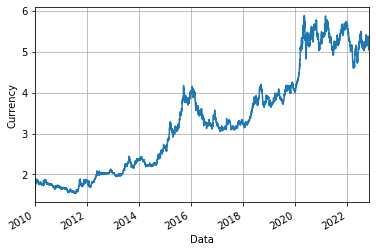

In [8]:
datemin = min(alldates)
datemax = max(alldates)
print("datemin = ", datemin)
print("datemax = ", datemax)
ax = plt.gca()
ax.set_xlim(datemin, datemax)
def pricefmt(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = pricefmt
ax.grid(True)
fig = plt.gcf()
fig.autofmt_xdate()
plt.xlabel("Data")
plt.ylabel("Currency")
plt.plot(alldates, allprices)


### Exercício 7

> Encontre a raiz $x^{\star} \approx 8.51$ da equação
> 
> $$f(x) = 2 \cosh\left(\dfrac{x}{4}\right) − x$$
> 
> usando o método do ponto fixo.

In [9]:
lowroot = 2.357551053877658
highroot = 8.507199570713663

In [10]:
def fixedpoint(g: Callable[[float], float], p0: float, atol: float, nitermax: Optional[int] = 100, atolmax: Optional[float] = 1e+4, verbose: bool = False):
    """
    Find a root of the function 'f' given the initial point 'p0' using the fixed point method.
    It returns the solution if it converges:
        abs(p^{k+1} - p^{k}) < atol
    If it could not find the solution, it will give an error:
        - If the number of iterations reached 'nitermax'
        - If the distance of two points are bigger than 'atolmax'
    """
    if not callable(g):
        raise TypeError("The function g must be callable")
    if atol <= 0:
        raise ValueError("The tolerance must be positive")
    p0 = float(p0)
    if verbose:
        print(f"p[0] = ", p0)
    nitermax = int(nitermax)
    for n in range(nitermax):
        p = g(p0)        
        if verbose:
            print(f"p[{n}] = ", p)
        error = np.abs(p-p0)
        if error < atol:
            return p
        if error > atolmax:
            raise ValueError(f"At iteration {k+1}, the distance between two points is too big:\n    p[{k+1}] = {p}\n    p[{k}] = {p0}")
        p0 = p
    raise ValueError(f"Could not find the solution with tolerance {atol:.2e} with {nitermax} iterations")


In [11]:
def f(x: float) -> float:
    return 2*np.cosh(x/4) - x

def g1(x: float) -> float:
    return 2*np.cosh(x/4)

p0 = 8.5
atol = 1e-4
p = fixedpoint(g1, p0, atol, verbose=True)
print(f" Initial guess:   p0 = {p0}")
print(f"Final solution:    p = {p}")
print(f"     Tolerance: atol = {atol:.1e}")

p[0] =  8.5
p[0] =  8.492330456393985
p[1] =  8.476520980662274
p[2] =  8.444030662824513
p[3] =  8.377672804127128
p[4] =  8.243856838591412
p[5] =  7.980869755254201
p[6] =  7.489785938745872
p[7] =  6.657936411570173
p[8] =  5.472235375565866
p[9] =  4.1823196748936065
p[10] =  3.196535867745466
p[11] =  2.6733326372222495
p[12] =  2.4635448573385212
p[13] =  2.391458502141875
p[14] =  2.368216852328971
p[15] =  2.3608877479826496
p[16] =  2.3585931042522112
p[17] =  2.357876310263873
p[18] =  2.3576525593513957
p[19] =  2.3575827298641867
 Initial guess:   p0 = 8.5
Final solution:    p = 2.3575827298641867
     Tolerance: atol = 1.0e-04


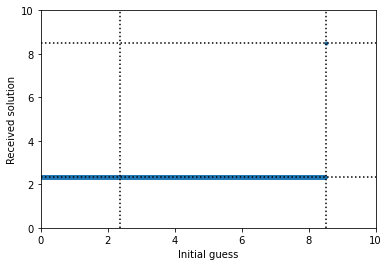

In [12]:
p0s = np.linspace(0, highroot-1e-6, 1029)
pfs = np.zeros(p0s.shape)
for i, p0 in enumerate(p0s):
    try:
        pfs[i] = fixedpoint(g1, p0, atol, nitermax=100)
    except ValueError as e:
        pfs[i] = float('inf')
plt.scatter(p0s, pfs, marker=".")
plt.xlabel("Initial guess")
plt.ylabel("Received solution")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(y=lowroot, ls="dotted", color="k")
plt.axhline(y=highroot, ls="dotted", color="k")
plt.axvline(x=lowroot, ls="dotted", color="k")
plt.axvline(x=highroot, ls="dotted", color="k")
plt.show()

Então, como o método converge apenas para a raiz próximo de $2$, então temos que utilizar uma outra função $g$, partindo da função $f$:

$$
f(x) = 2\cosh \left(\dfrac{x}{4}\right) - x
$$

Como para $x^{\star}$ teremos $f(x^{\star}) = 0$, logo

$$
2\cosh \left(\dfrac{x^{\star}}{4}\right) - x^{\star} = 0
$$
$$
\cosh \left(\dfrac{x^{\star}}{4}\right) = \dfrac{x^{\star}}{2}
$$
$$
x^{\star} = 4 \ \text{arccosh} \left(\dfrac{x^{\star}}{2}\right)
$$
$$
x^{\star} = 4\ln \left(\dfrac{x^{\star}}{2} + \sqrt{\left(\dfrac{x^{\star}}{2}\right)^2-1}\right)
$$

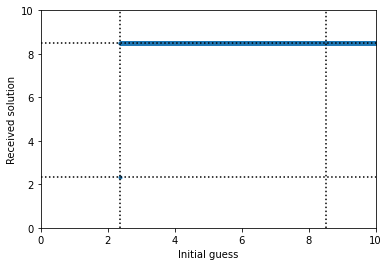

In [13]:
def g2(x: float) -> float:
    return 4*np.log((x/2) + np.sqrt( (x/2)**2-1))

p0s = np.linspace(lowroot+1e-6, 10, 1029)
pfs = np.zeros(p0s.shape)
for i, p0 in enumerate(p0s):
    try:
        pfs[i] = fixedpoint(g2, p0, atol, nitermax=100)
    except ValueError as e:
        pfs[i] = float('inf')
plt.scatter(p0s, pfs, marker=".")
plt.xlabel("Initial guess")
plt.ylabel("Received solution")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(y=lowroot, ls="dotted", color="k")
plt.axhline(y=highroot, ls="dotted", color="k")
plt.axvline(x=lowroot, ls="dotted", color="k")
plt.axvline(x=highroot, ls="dotted", color="k")
plt.show()

Contudo, podemos utilizar uma terceira função $g$, que é dado por

$$
g(x) = x - \dfrac{f}{f'} 
$$
$$
g(x) = x - \dfrac{2\cosh \left(\dfrac{x}{4}\right) - x}{\dfrac{1}{2}\sinh \left(\dfrac{x}{4}\right) - 1}
$$
$$
g(x) = \dfrac{x \sinh\left(\dfrac{x}{4}\right) - 4\cosh \left(\dfrac{x}{4}\right)}{\sinh \left(\dfrac{x}{4}\right) - 2}
$$

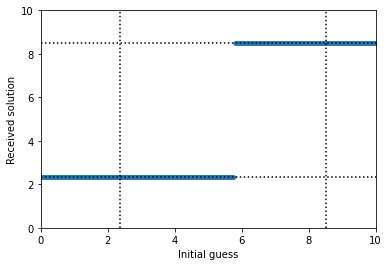

In [14]:
def g3(x: float) -> float:
    sinh = np.sinh(x/4)
    cosh = np.cosh(x/4)
    return (x*sinh - 4*cosh)/(sinh - 2)

p0s = np.linspace(0, 10, 1029)
pfs = np.zeros(p0s.shape)
for i, p0 in enumerate(p0s):
    try:
        pfs[i] = fixedpoint(g3, p0, atol, nitermax=100)
    except ValueError as e:
        pfs[i] = float('inf')
plt.scatter(p0s, pfs, marker=".")
plt.xlabel("Initial guess")
plt.ylabel("Received solution")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(y=lowroot, ls="dotted", color="k")
plt.axhline(y=highroot, ls="dotted", color="k")
plt.axvline(x=lowroot, ls="dotted", color="k")
plt.axvline(x=highroot, ls="dotted", color="k")
plt.show()

### Exercício 8

> Encontre as raízes da equação
> 
> $$f(x) = 2 \cosh\left(\dfrac{x}{4}\right) − x$$
> 
> utilizando o método da secante.


In [15]:
def secant(f: Callable[[float], float], p0: float, p1: float, atol: float, nitermax: Optional[int]=10, verbose: bool = False):
    n = 1
    q0 = f(p0)
    q1 = f(p1)
    if verbose:
        print("p[0] = ", p0)
        print("p[1] = ", p1)
    for n in range(nitermax):
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if verbose:
            print(f"p[{n+2}] = ", p)
        if abs(p - p1) < atol:
            return p
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    raise ValueError(f"Could not find the solution with tolerance {atol:.2e} with {nitermax} iterations")


In [16]:
def f(x: float) -> float:
    return 2*np.cosh(x/4) - x

p0 = 0
p1 = 4
atol = 1e-4
p = secant(f, p0, p1, atol, verbose=True)
print(f" Initial guess:   p0 = {p0}")
print(f"              :   p1 = {p1}")
print(f"Final solution:    p = {p}")
print(f"     Tolerance: atol = {atol: .2e}")
print(f"         Error:  err = {np.abs(p-lowroot): .2e} ")

p[0] =  0
p[1] =  4
p[2] =  2.7455191382487723
p[3] =  2.258358411337213
p[4] =  2.3618634493443804
p[5] =  2.3575962168915945
p[6] =  2.357551033006328
 Initial guess:   p0 = 0
              :   p1 = 4
Final solution:    p = 2.357551033006328
     Tolerance: atol =  1.00e-04
         Error:  err =  2.09e-08 


C:\Users\Carlos\AppData\Local\Temp\ipykernel_10924\659221612.py:9: RuntimeWarning: invalid value encountered in double_scalars
  p = p1 - q1 * (p1 - p0) / (q1 - q0)
C:\Users\Carlos\AppData\Local\Temp\ipykernel_10924\2135264142.py:2: RuntimeWarning: overflow encountered in cosh
  return 2*np.cosh(x/4) - x


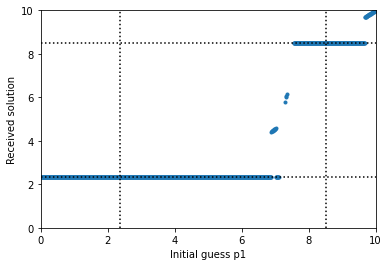

In [17]:
p1s = np.linspace(0, 10, 1029)
pfs = np.zeros(p1s.shape)
for i, p1 in enumerate(p1s):
    try:
        pfs[i] = secant(f, 0, p1, atol)
    except ValueError as e:
        pfs[i] = float('inf')
plt.scatter(p0s, pfs, marker=".")
plt.xlabel("Initial guess p1")
plt.ylabel("Received solution")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.axhline(y=lowroot, ls="dotted", color="k")
plt.axhline(y=highroot, ls="dotted", color="k")
plt.axvline(x=lowroot, ls="dotted", color="k")
plt.axvline(x=highroot, ls="dotted", color="k")
plt.show()

### Exercicio 9

> Utilizando a função do exercício anterior, compare a convergência para o resultado final obtida pelos 4 métodos:
> * bissecção
> * ponto fixo
> * Newton
> * Secante
> 
> Faça um gráfico de $k \times e_{k}$, com $e_{k} = \left|x^{\star} − x_{k}\right|$ sendo o erro da iteração $k$, comparando os métodos (utilize escala logarítmica para $e_{k}$).
> Comente os seus resultados.
> Considere as duas raízes como sendo
> 
> * $x^{\star} = 2.3575510538774$
> * $x^{\star} = 8.5071995707130$
> 
> e utilize uma tolerância de $10^{−10}$.

In [18]:
def bisseccao(f: Callable[[float], float], a: float, b: float, atol: float):
    ms = []
    fa, fb = f(a), f(b)
    while True:
        m = (a+b)/2
        ms.append(m)
        if np.abs(b-a) < 2*atol:
            return ms
        fm = f(m)
        if fm == 0:  # Happy ending
            return ms
        if fm*fa < 0:
            b, fb = m, fm
        else:
            a, fa = m, fm

def pontofixo(g: Callable[[float], float], p0: float, atol: float):
    atolmax = 1e+5
    nitermax = 100
    ps = []
    p0 = float(p0)
    ps.append(p0)
    for n in range(nitermax):
        p = g(p0)
        ps.append(p)       
        error = np.abs(p-p0)
        if error < atol:
            return ps
        if error > atolmax:
            raise ValueError(f"At iteration {k+1}, the distance between two points is too big:\n    p[{k+1}] = {p}\n    p[{k}] = {p0}")
        p0 = p
    raise ValueError("Nao convergiu")

def newton(f: Callable[[float], float], f_: Callable[[float], float], p0: float, atol: float):
    g = lambda x: x - f(x)/f_(x)
    return pontofixo(g, p0, atol)

def secante(f: Callable[[float], float], p0: float, p1: float, atol: float):
    p0, p1 = float(p0), float(p1)
    ps = [p0, p1]
    nitermax = 100
    q0 = f(p0)
    q1 = f(p1)
    for n in range(nitermax):
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        ps.append(p)
        if abs(p - p1) < atol:
            return ps
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
    raise ValueError(f"Could not find the solution with tolerance {atol:.2e} with {nitermax} iterations")
    

Para a raiz inferior, $x^{\star} \approx 2.36$

In [19]:
atol = 1e-10
root = lowroot

# bisseccao
a, b = 0, 5
f = lambda x: 2*np.cosh(x/4)-x
ms = bisseccao(f, a, b, atol)
ms = np.array(ms)
ems = np.abs(ms - root)

# ponto fixo
p0 = 2
g = lambda x: 2*np.cosh(x/4)
ps = pontofixo(g, p0, atol)
ps = np.array(ps)
eps = np.abs(ps - root)

# newton
p0 = 2
f_ = lambda x: np.sinh(x/4)/2 - 1
ns = newton(f, f_, p0, atol)
ns = np.array(ns)
ens = np.abs(ns - root)

# secante
p0 = 2
p1 = 3
ss = secante(f, p0, p1, atol)
ss = np.array(ss)
ess = np.abs(ss - root)

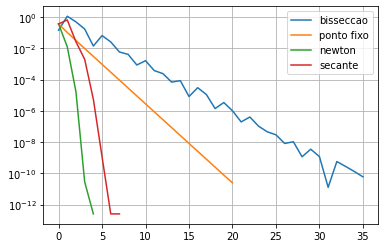

In [20]:
plt.plot(np.arange(len(ems)), ems, label="bisseccao")
plt.plot(np.arange(len(eps)), eps, label="ponto fixo")
plt.plot(np.arange(len(ens)), ens, label="newton")
plt.plot(np.arange(len(ess)), ess, label="secante")
plt.grid()
plt.legend()
plt.yscale("log")

### Exercício 10

> Encontre um valor aproximado para $\sqrt{2}$ utilizando o método do ponto fixo.


Encontrar o valor de $\sqrt{2}$ é basicamente encontrar o valor de $x^{\star}$ positivo tal que:

$$
f(x) = x^2 - 2 \ \ \ \ \ \ \ \ \ f(x^{\star}) = 0
$$

Para o método do ponto fixo, podemos pegar $g(x)$ especificamente

$$
g(x) = x - \dfrac{f(x)}{f'(x)} = x - \dfrac{x^2-2}{2x} = \dfrac{x^2+2}{2x}
$$

Como ponto inicial, podemos pegar o próximo valor que queremos encontrar as raizes:

In [21]:
def g(x: float) -> float:
    return (x**2+2)/(2*x)

p0 = 2
p = fixedpoint(g, p0, 1e-7, verbose=True)
print(f" Raiz de 2 = {p:.15}")
print(f"np.sqrt(2) = {np.sqrt(2):.15}")

p[0] =  2.0
p[0] =  1.5
p[1] =  1.4166666666666667
p[2] =  1.4142156862745099
p[3] =  1.4142135623746899
p[4] =  1.414213562373095
 Raiz de 2 = 1.41421356237309
np.sqrt(2) = 1.4142135623731


### Exercicio 11

> Desenvolva um código para o método da bissecção que verifique se $f(a) \cdot f(b) < 0$ antes de iniciar o processo iterativo e que tenha um limite no número de iterações.
> Se o *loop* alcançar esse limite, o código para e uma mensagem de erro é exibida.
> Coloque todo o método dentro de uma função (do Python), com entradas e saídas de acordo com o algoritmo. 
> Faça alguns testes.


In [22]:
def biseccao(f: Callable[[float], float], a: float, b: float, nitermax: Optional[float] = 20, verbose: bool=True):
    if b <= a:
        raise ValueError(f"The value of b must be greater than a. [a, b] = [{a}, {b}]")
    
    fa = f(a)
    fb = f(b)
    if verbose:
        print("a = ", a)
        print("b = ", b)
    if fa*fb > 0:
        raise ValueError("The value of f(a) * f(b) is positive! No root here!")
    for n in range(nitermax):
        p = (a+b)/2
        print(f"p[{n+1}] = ", p)
        fp = f(p)
        if fp == 0:  # Happy ending
            return p
        if fa*fp < 0:
            b = p
        else:
            a = p
    return (a+b)/2

a, b = 0, 5
def f(x: float) -> float:
    return 2*np.cosh(x/4) - x
xstar = biseccao(f, a, b, verbose=True)
print("bissection = ", xstar)
print("  low root = ", lowroot)
print(" error = %.2e" % np.abs(xstar-lowroot))

a =  0
b =  5
p[1] =  2.5
p[2] =  1.25
p[3] =  1.875
p[4] =  2.1875
p[5] =  2.34375
p[6] =  2.421875
p[7] =  2.3828125
p[8] =  2.36328125
p[9] =  2.353515625
p[10] =  2.3583984375
p[11] =  2.35595703125
p[12] =  2.357177734375
p[13] =  2.3577880859375
p[14] =  2.35748291015625
p[15] =  2.357635498046875
p[16] =  2.3575592041015625
p[17] =  2.3575210571289062
p[18] =  2.3575401306152344
p[19] =  2.3575496673583984
p[20] =  2.3575544357299805
bissection =  2.3575520515441895
  low root =  2.357551053877658
 error = 9.98e-07


### Exercício 12

> Seja uma função $f$ contínua em um intervalo $\left[a, \ b\right]$, com $f'$ e $f''$ também contínuas
nesse intervalo.
> Considere ainda que existe uma raiz $x^{\star} \in \left[a, \ b\right]$ tal que $f(x^{\star}) = 0$ e $f'(x^{\star}) \ne 0$.
> Nesse caso, mostre que o método de Newton tem convergência de segunda ordem.

### Exercício 13

> Use um polinômio de Taylor em torno de $45 \ ^o$ para aproximar $\cos 41 \ ^o$
com uma precisão de $10^{−6}$.


Temos a expansão em série de Taylor ao redor de $x_0$ é dado por

$$
f(x) = f(x_0) + (x-x_0) \cdot f'(x_0) + \dfrac{1}{2}(x-x_0)^2 \cdot f''(x_0) + \Omega \left(\left(x-x_0\right)^{3}\right)
$$

Para o cosseno, temos que

$$
\cos \theta = \cos \theta_0 - \left(\theta - \theta_0\right) \cdot \sin \theta_0 - \dfrac{1}{2}\left(\theta-\theta_0\right)^2 \cdot \cos \theta_0 + \Omega \left(\left(\theta-\theta_0\right)^{3}\right)
$$

Com $\theta_0 = \dfrac{\pi}{4}$, teremos

$$\cos \theta_0 = \sin \theta_0 = \dfrac{1}{\sqrt{2}}$$

$$
\cos \theta = \dfrac{1}{\sqrt{2}}\left[1 - \left(\theta - \dfrac{\pi}{4}\right) - \dfrac{1}{2}\left(\theta - \dfrac{\pi}{4}\right)^2+ \dfrac{1}{6}\left(\theta - \dfrac{\pi}{4}\right)^3\right]
$$

In [23]:
def cosseno_approx(theta: float) -> float:
    dtheta = theta - (np.pi/4)
    result = 1 - dtheta - (dtheta**2)/2 + (dtheta**3)/6
    return result/np.sqrt(2)

theta = 41 * (np.pi/180)
cos41approx = cosseno_approx(theta)
cos41numpy = np.cos(theta)
error = np.abs(cos41numpy-cos41approx)
print("Nossa aproximacao cos 41 = %.10f" % cos41approx)
print("      Numpy valor cos 41 = %.10f" % cos41numpy)
print(" Error = %.3e" % error)

Nossa aproximacao cos 41 = 0.7547088707
      Numpy valor cos 41 = 0.7547095802
 Error = 7.095e-07


### Exercicio 14

> Quando um fluido incompressível escoa em um tubo circular, em regime permanente, a queda de pressão $\Delta P$ devido ao atrito com a parede é dada pela equação
> 
> $$\Delta P = -0.5 \ f\rho V^2 \ \left(\dfrac{L}{D}\right)$$
> 
> em que 
> 
> * $\rho$ é a densidade do fluido
> * $V$ é a velocidade média
> * $L$ é o comprimento do tubo
> * $D$ é o diâmetro.
> * $f$ representa o fator de atrito de Darcy
>
> Existem diferentes fórmulas empíricas para o fator $f$ em função do número de Reynolds $Re = \dfrac{\rho V D}{\mu}$, em que $\mu$ é a viscosidade dinâmica do fluido.
> 
> Para um escoamento turbulento completamente desenvolvido em um tubo com rugosidade de superfície $\varepsilon$, o modelo desenvolvido por Colebrook é dado por
> 
> $$\dfrac{1}{f^{1/2}} = -2 \cdot \log_{10}\left(\dfrac{\varepsilon/D}{3.7} + \dfrac{2.51}{Re \cdot f^{1/2}}\right)$$
> 
> Desenvolva um método numérico para calcular $f$, dados $\varepsilon/D$ e $Re$.
> Utilize, como chute inicial em suas iterações, o valor aproximado de $f$ dado por Generaux,
> 
> $$f = 0.16 \cdot Re^{-0.16}$$
> 
> Faça um gráfico de $Re \times f$ para $\varepsilon/D = 0.001$, com $10^4 ≤ Re ≤ 10^7$.

Seja a função $h(f)$ a que queremos encontrar a raiz, com parâmetros fixos $r$ (rugosidade relativa) e $R$ (Reynolds)

$$
h(f) = \dfrac{1}{f^{1/2}} + 2 \cdot \log_{10}\left(\dfrac{r}{3.7} + \dfrac{2.51}{R \cdot f^{1/2}}\right)
$$

Para calcular, utilizaremos o método de Newton

$$
g(f) = f - \dfrac{h}{h'}
$$

In [24]:
import sympy as sp
f = sp.symbols("f", real=True, positive=True)
r, R = sp.symbols("r R", real=True, positive=True)
h = 1/sp.sqrt(f) + (2/sp.log(10)) * sp.log((r/3.7) + 2.51/(R*sp.sqrt(f)))
h_ = sp.diff(h, f)
g3var = f - h/h_
g3var = sp.lambdify((f, r, R), g3var)

In [25]:
r = 0.001
Rs = 10**np.linspace(4, 7, 1029, dtype="float64")
fs = np.zeros(Rs.shape, dtype="float64")
atol = 1e-9
for i, R in enumerate(Rs):
    f0 = 0.16 * R**(-0.16)
    g = lambda f: g3var(f, r, R)
    fs[i] = fixedpoint(g, f0, atol)

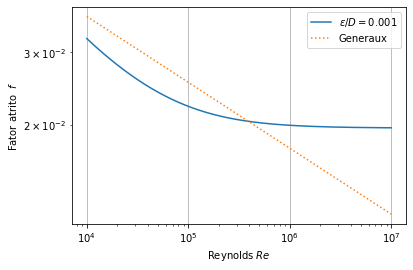

In [26]:
plt.plot(Rs, fs, label=r"$\epsilon/D = 0.001$")
plt.plot(Rs, 0.16*Rs**(-0.16), ls="dotted", label="Generaux")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Reynolds $Re$")
plt.ylabel(r"Fator atrito  $f$")
plt.legend()
plt.grid()